Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency > 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

### Food is life dataset

In [6]:
from google.colab import files
uploaded = files.upload()

Saving whats-cooking.zip to whats-cooking.zip


In [7]:
!unzip whats-cooking.zip

Archive:  whats-cooking.zip
  inflating: train.json              
  inflating: sample_submission.csv   
  inflating: test.json               


In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_json('train.json')
print(df.shape)
df.head()

(39774, 3)


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


### Column to predict is 'cuisine'

In [33]:
df['cuisine'].describe()

count       39774
unique         20
top       italian
freq         7838
Name: cuisine, dtype: object

### How target is distributed

In [34]:
y= df['cuisine']
y.nunique()

20

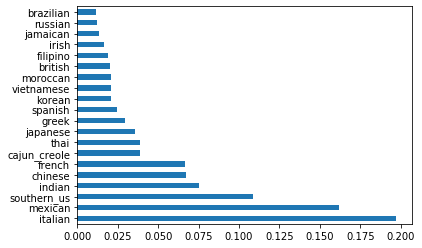

In [35]:
y.value_counts(normalize=True).plot.barh();

There are 20 classes, this is a classification problem. The majority class occurs with 20% frequency. I could use accuracy score as my evaluation metric.

Precision when predicting cuisine type is very important.

In [0]:
pepper = df['ingredients'].str.contains('pepper')
garlic = df['ingredients'].str.contains('garlic')
eggs = df['ingredients'].str.contains('eggs')
olive_oil = df['ingredients'].str.contains('olive oil')


In [39]:
ingredients = pd.DataFrame(df['ingredients'].tolist())
ingredients.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,eggs,pepper,salt,mayonaise,cooking oil,green chilies,grilled chicken breasts,garlic powder,yellow onion,soy sauce,butter,chicken livers,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,water,vegetable oil,wheat,salt,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,black pepper,shallots,cornflour,cayenne pepper,onions,garlic paste,milk,butter,salt,lemon juice,water,chili powder,passata,oil,ground cumin,boneless chicken skinless thigh,garam masala,double cream,natural yogurt,bay leaf,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [0]:
ingredients.replace('ground black pepper', 'pepper', inplace = True)
ingredients.replace('ground pepper', 'pepper', inplace = True)
ingredients.replace('black pepper', 'pepper', inplace = True)
ingredients.replace('garlic cloves', 'garlic', inplace = True)
ingredients.replace('unsalted butter', 'butter', inplace = True)
ingredients.replace('large eggs', 'eggs', inplace = True)
ingredients.replace('extra-virgin olive oil', 'olive oil', inplace = True)
ingredients.replace('fresh lime juice', 'lime', inplace = True)
ingredients.replace('flat leaf parsley', 'fresh parsley', inplace = True)
ingredients.replace('grated parmesan cheese', 'parmesan cheese', inplace = True)
ingredients.replace('fresh ginger', 'ginger', inplace = True)
ingredients.replace('all-purpose flour', 'flour', inplace = True)
ingredients.replace('ground cinnamon', 'cinnamon', inplace = True)
ingredients.replace('ground turmeric', 'turmeric', inplace = True)

In [41]:
ingredients= ingredients.fillna('NaN')
ingredients = ingredients.replace('None', np.nan)
print(ingredients.shape)
ingredients.head()

(39774, 65)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,plain flour,pepper,salt,tomatoes,pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,eggs,pepper,salt,mayonaise,cooking oil,green chilies,grilled chicken breasts,garlic powder,yellow onion,soy sauce,butter,chicken livers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,water,vegetable oil,wheat,salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pepper,shallots,cornflour,cayenne pepper,onions,garlic paste,milk,butter,salt,lemon juice,water,chili powder,passata,oil,ground cumin,boneless chicken skinless thigh,garam masala,double cream,natural yogurt,bay leaf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
ingredients.columns = ['Ingredient #1', 'Ingredient #2', 'Ingredient #3', 'Ingredient #4',
                       'Ingredient #5','Ingredient #6','Ingredient #7','Ingredient #8',
                       'Ingredient #9','Ingredient #10','Ingredient #10','Ingredient #12',
                       'Ingredient #13','Ingredient #14','Ingredient #15','Ingredient #16',
                       'Ingredient #17','Ingredient #18','Ingredient #19','Ingredient #20',
                       'Ingredient #21','Ingredient 22','Ingredient #23','Ingredient #24',
                       'Ingredient #25','Ingredient #26','Ingredient #27','Ingredient #28',
                       'Ingredient #29','Ingredient #30','Ingredient #31','Ingredient #32',
                       'Ingredient #33','Ingredient #34','Ingredient #35','Ingredient #36',
                       'Ingredient #37','Ingredient #38','Ingredient #39','Ingredient #40',
                       'Ingredient #41','Ingredient #42','Ingredient #43','Ingredient #44',
                       'Ingredient #45','Ingredient #46','Ingredient #47','Ingredient #48',
                       'Ingredient #49','Ingredient #50','Ingredient #51','Ingredient #52',
                       'Ingredient #53','Ingredient #54','Ingredient #55','Ingredient #56',
                       'Ingredient #57','Ingredient #58','Ingredient #59','Ingredient #60',
                       'Ingredient #61','Ingredient #62','Ingredient #63','Ingredient #64', 'Ingredient #65']
print(ingredients.shape)
ingredients.head()

(39774, 65)


,Ingredient #1,Ingredient #2,Ingredient #3,Ingredient #4,Ingredient #5,Ingredient #6,Ingredient #7,Ingredient #8,Ingredient #9,Ingredient #10,Ingredient #10,Ingredient #12,Ingredient #13,Ingredient #14,Ingredient #15,Ingredient #16,Ingredient #17,Ingredient #18,Ingredient #19,Ingredient #20,Ingredient #21,Ingredient 22,Ingredient #23,Ingredient #24,Ingredient #25,Ingredient #26,Ingredient #27,Ingredient #28,Ingredient #29,Ingredient #30,Ingredient #31,Ingredient #32,Ingredient #33,Ingredient #34,Ingredient #35,Ingredient #36,Ingredient #37,Ingredient #38,Ingredient #39,Ingredient #40,Ingredient #41,Ingredient #42,Ingredient #43,Ingredient #44,Ingredient #45,Ingredient #46,Ingredient #47,Ingredient #48,Ingredient #49,Ingredient #50,Ingredient #51,Ingredient #52,Ingredient #53,Ingredient #54,Ingredient #55,Ingredient #56,Ingredient #57,Ingredient #58,Ingredient #59,Ingredient #60,Ingredient #61,Ingredient #62,Ingredient #63,Ingredient #64,Ingredient #65
0,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,plain flour,pepper,salt,tomatoes,pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,eggs,pepper,salt,mayonaise,cooking oil,green chilies,grilled chicken breasts,garlic powder,yellow onion,soy sauce,butter,chicken livers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,water,vegetable oil,wheat,salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pepper,shallots,cornflour,cayenne pepper,onions,garlic paste,milk,butter,salt,lemon juice,water,chili powder,passata,oil,ground cumin,boneless chicken skinless thigh,garam masala,double cream,natural yogurt,bay leaf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
